In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (5, 3) # set default figure size
import flopy as fp  # import flopy and call it fp
import glob
import imageio
import IPython
import datetime
import xarray as xr
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### run varrying parameters in `vary_params.py` 
#### vary K & porosity

In [2]:
files = glob.glob(r'output/model_output_2024-02-01 19*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
# correct_arr = np.array([load_arr[:,0], load_arr[:,2],load_arr[:,4]]).T
# load_arr = correct_arr

using latest output\model_output_2024-02-01 19_24.txt


In [3]:
# files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
files = glob.glob(r'output/parameter_output_2024-02-01 19*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
n_kh_vals = 3
kh_var = load_params[:n_kh_vals]
npor_var = load_params[n_kh_vals:]

In [4]:
kh_var

array([10., 25., 40.])

In [5]:
npor_var

array([0.5 , 0.35, 0.2 ])

In [6]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1
n_years = 10
cycle_n = np.arange(0, n_years,1)
cycle_n_arr = np.array(cycle_n) + 1

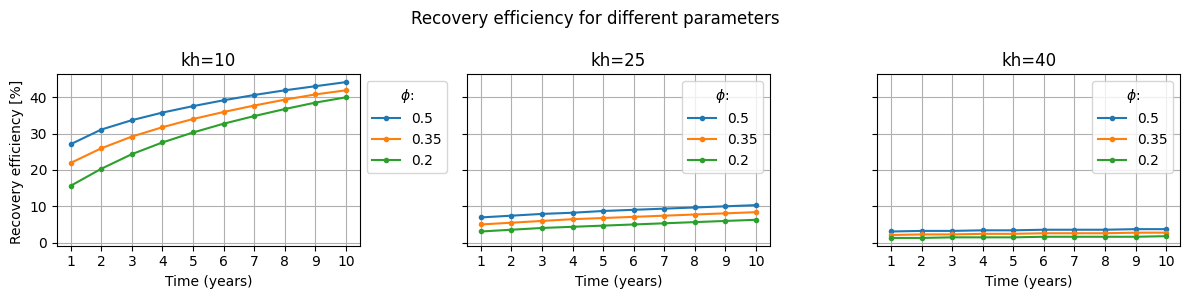

In [7]:
lst_reorganise_data_1 = []
lst_reorganise_prams_1 = kh_var
n = 0
fname = r'figures/recovery_Q_vary_k_npor.png'
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(kh_var[i])}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    lst_j = []
    for j in range(len(npor_var)):
        axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
        axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        lst_j.append(load_arr[n,:])
        n+=1
    lst_reorganise_data_1.append(lst_j)
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

In [8]:
lst_reorganise_data_1

[[array([27.09677419, 31.12903226, 33.70967742, 35.80645161, 37.58064516,
         39.19354839, 40.64516129, 41.93548387, 43.06451613, 44.19354839]),
  array([21.93548387, 25.96774194, 29.19354839, 31.77419355, 34.03225806,
         35.96774194, 37.74193548, 39.35483871, 40.80645161, 41.93548387]),
  array([15.64516129, 20.32258065, 24.35483871, 27.58064516, 30.32258065,
         32.74193548, 34.83870968, 36.77419355, 38.5483871 , 40.        ])],
 [array([ 6.93548387,  7.41935484,  7.90322581,  8.22580645,  8.70967742,
          9.03225806,  9.35483871,  9.67741935, 10.        , 10.32258065]),
  array([5.        , 5.48387097, 5.96774194, 6.4516129 , 6.77419355,
         7.09677419, 7.41935484, 7.74193548, 8.06451613, 8.38709677]),
  array([3.06451613, 3.5483871 , 4.03225806, 4.35483871, 4.67741935,
         5.        , 5.32258065, 5.64516129, 5.96774194, 6.29032258])],
 [array([3.06451613, 3.22580645, 3.22580645, 3.38709677, 3.38709677,
         3.5483871 , 3.5483871 , 3.5483871 , 3.70

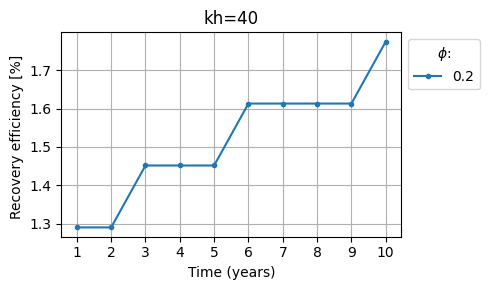

In [9]:
n = 0
fname = r'figures/recovery_Q_vary_k_npor_worst_case.png'
fig, ax = plt.subplots(1,1,figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery efficiency")
axs = [None, None, ax]
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [2]: 
        axs[i].set_ylabel("Recovery efficiency [%] ")
        axs[i].set_xlabel(r"Time (years)")
        axs[i].set_title(f"kh={int(kh_var[i])}")
        axs[i].set_xticks(ticks=cycle_n_arr)
        axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        if i in [2]:
            if n == 8:
                axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
                axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

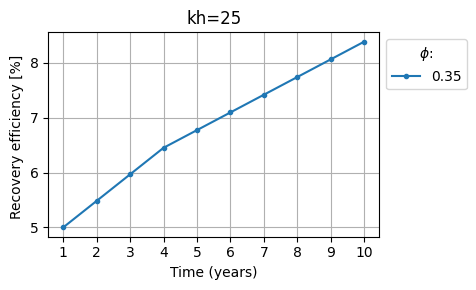

In [10]:
n = 0
fname = r'figures/recovery_Q_vary_k-25_npor.png'
fig, ax = plt.subplots(1,1,figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery efficiency")
axs = [None, ax, None]
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [1]: 
        axs[i].set_ylabel("Recovery efficiency [%] ")
        axs[i].set_xlabel(r"Time (years)")
        axs[i].set_title(f"kh={int(kh_var[i])}")
        axs[i].set_xticks(ticks=cycle_n_arr)
        axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        if i in [1]:
            if n == 4:
                axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
                axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

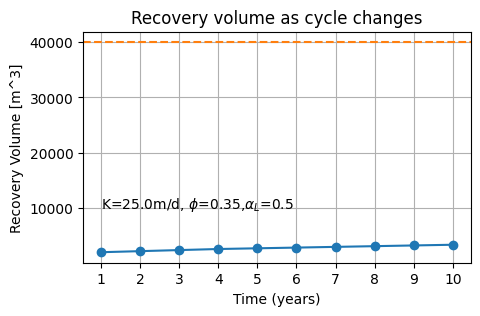

In [20]:
fname = r"figures/recovery_Q_cycles.png"
# run = True
cycle_n_arr = np.array(cycle_n) + 1
rec_eff_arr = np.array(load_arr[4])
plt.plot(cycle_n_arr,rec_eff_arr*Q_tot/100,marker="o")
plt.axhline(Q_d,ls="--",color="C1",label="Design production volume")
plt.ylabel("Recovery Volume [m^3]")
plt.xlabel(r"Time (years)")
plt.title(r"Recovery volume as cycle changes")
k  = kh_var[1]
npor = npor_var[1]
alphaL = 0.5
plt.annotate(fr'K={k}m/d, $\phi$={npor},$\alpha_L$={alphaL}',(1,10000))
plt.xticks(ticks=cycle_n_arr)
plt.grid()
plt.savefig(fname,bbox_inches="tight")

# repeat closer to 10

In [11]:
files = glob.glob(r'output/model_output_2024-02-02 11*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')

using latest output\model_output_2024-02-02 11_14.txt


In [12]:
# files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
files = glob.glob(r'output/parameter_output_2024-02-02 11*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
n_kh_vals = 3
kh_var = load_params[:n_kh_vals]
npor_var = load_params[n_kh_vals:]

In [13]:
kh_var

array([20., 15., 10.])

In [14]:
npor_var

array([0.5 , 0.35, 0.2 ])

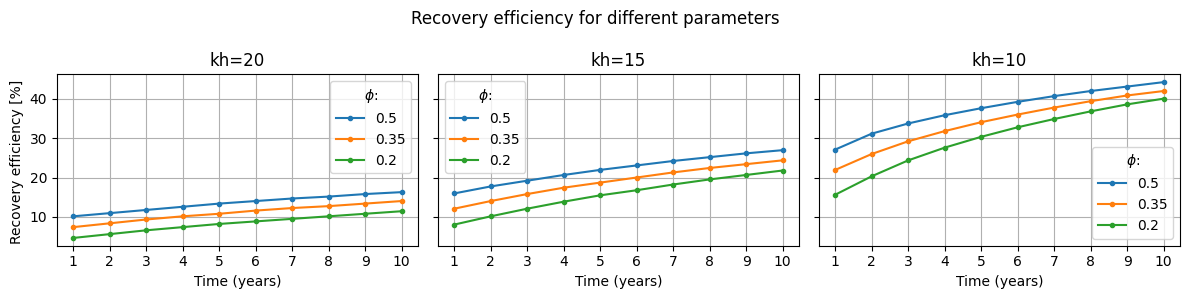

In [15]:
n = 0
lst_reorganise_data_2 = []
lst_reorganise_params_2 = kh_var
fname = r'figures/recovery_Q_vary_k_npor_smaller.png'
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(kh_var[i])}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    lst_j = []
    for j in range(len(npor_var)):
        axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
        axs[i].legend(title=r"$\phi$:")
        lst_j.append(load_arr[n,:])
        n+=1
    lst_reorganise_data_2.append(lst_j)
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

# combine two plots for report

In [16]:
combined_params = np.append(lst_reorganise_params_2, lst_reorganise_prams_1)
combined_data = np.vstack([lst_reorganise_data_2, lst_reorganise_data_1])
d = {}
for index, param in enumerate(combined_params):
    d[param]=index
sorted_params = sorted(list(set(combined_params)))

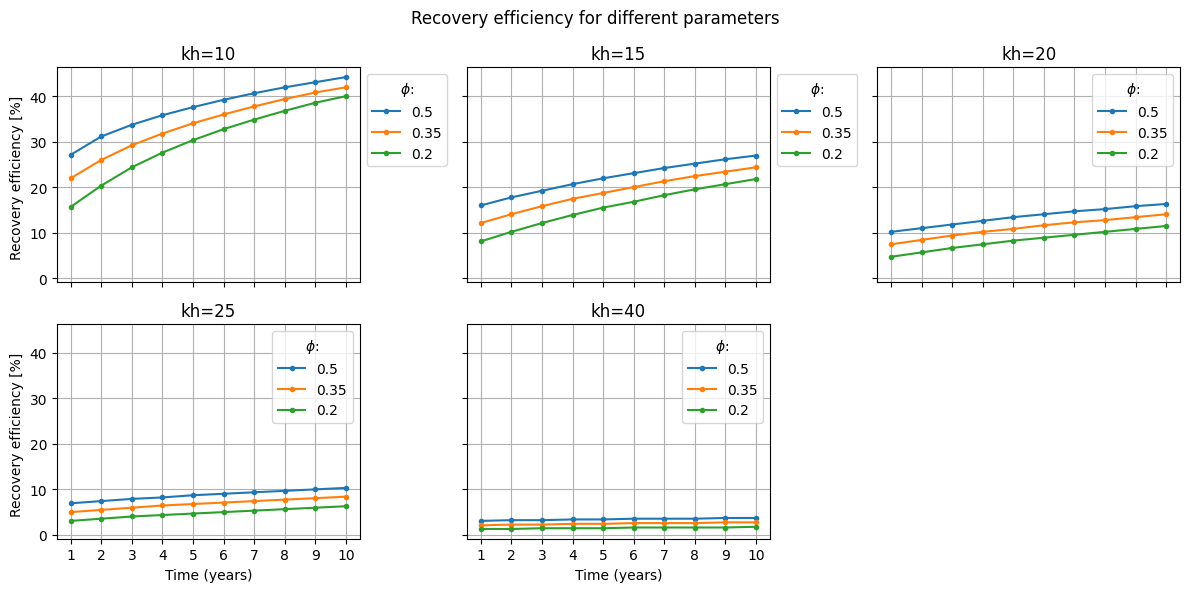

In [17]:
n = 0

fname = r'figures/recovery_Q_vary_k_npor_combined.png'
fig, ax = plt.subplots(2,3,figsize=(12,6),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i,k_val_par in enumerate(sorted_params):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0,3]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [3,4,5]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(k_val_par)}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        axs[i].plot(cycle_n_arr,combined_data[d[k_val_par]][j],marker=".",label=f"{npor_var[j]}")
        axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        n+=1
axs[-1].remove()
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

#### vary alpha_L

In [18]:
files = glob.glob(r'output/model_alpha_output_2024-02-01*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
load_arr[0,:]

using latest output\model_alpha_output_2024-02-01 22_46.txt


array([27.09677419, 31.12903226, 33.70967742, 35.80645161, 37.58064516,
       39.19354839, 40.64516129, 41.93548387, 43.06451613, 44.19354839])

In [19]:
files = glob.glob(r'output/parameter_alpha_output_2024-02-01*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
alphaL_var = load_params[:]
alphaL_var

array([0.5 , 1.25, 2.  ])

In [20]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1.25
cycle_n = np.arange(0, 10,1)
cycle_n_arr = np.array(cycle_n) + 1

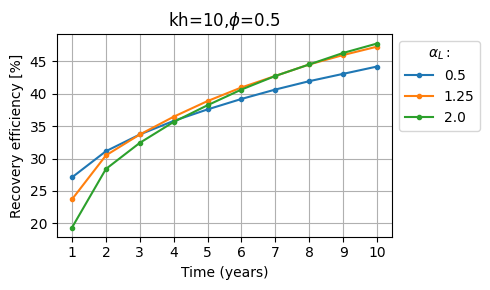

In [21]:
n = 0
fname = r'figures/recovery_Q_vary_alpha_L.png'
fig, ax = plt.subplots(1,figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery volume for different parameters")
axs = [ax]
i = 0
axs[i].set_ylabel("Recovery efficiency [%]")
axs[i].set_xlabel(r"Time (years)")
axs[i].set_title(fr"kh=10,$\phi$=0.5")
axs[i].set_xticks(ticks=cycle_n_arr)
axs[i].grid()
for j in range(len(alphaL_var)):
    cycle_n_arr = np.array(cycle_n) + 1
    axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{alphaL_var[j]}")
    n+=1
axs[i].legend(bbox_to_anchor=(1,1),title=r"$\alpha_L:$")
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

# Make nice contour plots
These make use of xarray `*.nc` files which are the results of running `vary_params_MP.py` - large data files and thus ommited

In [25]:
k_lst = [10, 25, 40]
npor_lst = [0.2,0.35, 0.5]
params = [[k, npor, 0.5] for k in k_lst for npor in npor_lst]

In [27]:
path = r'D:\large_data_sets\crossover subsurface'

In [28]:
ds_lst = []
nlay = 20
n_years = 10
for k, npor, alphaL in params:
    fname_in = fr'{path}\store_concentrations_k-{k}_npor-{npor}_alphaL-{alphaL}-nlay-{nlay}_nyears-{n_years}*.nc'
    files = glob.glob(fname_in)[-1]
    ds_lst.append(xr.open_dataarray(files))
    print(files)

D:\large_data_sets\crossover subsurface\store_concentrations_k-10_npor-0.2_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_42.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-10_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 19_17.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-10_npor-0.5_alphaL-0.5-nlay-20_nyears-10_2024-02-01 22_46.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-25_npor-0.2_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_38.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-25_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_36.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-25_npor-0.5_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_31.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-40_npor-0.2_alphaL-0.5-nlay-20_nyears-10_2024-02-01 18_54.nc
D:\large_data_sets\crossover subsurface\store_concentrations_k-40_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 18_56.nc
D:\la

In [29]:
time1 = "2024-02-01 19_48"
time2 = "2024-02-01 19_41"
r_300 = np.loadtxt(fr'output/model_radius_{time1}.txt')
r_200 = np.loadtxt(fr'output/model_radius_{time2}.txt')
zc = np.loadtxt(fr'output/model_z_{time1}.txt')

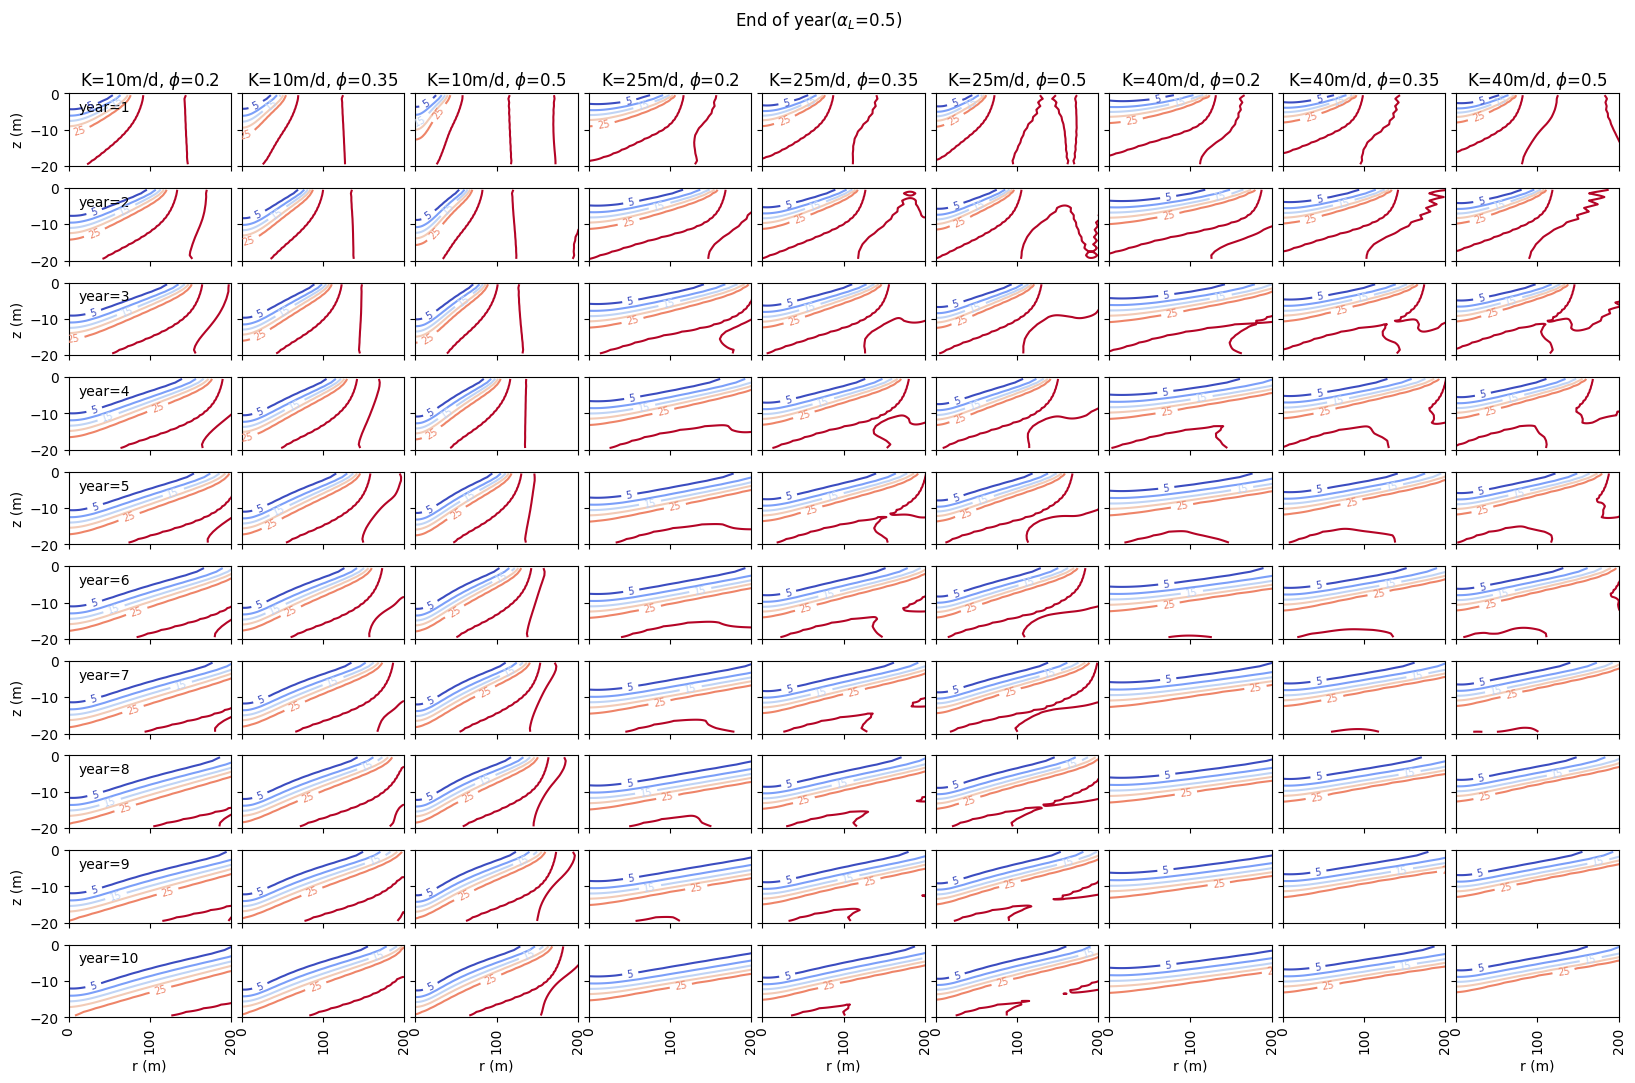

In [38]:
alphaL = 0.5

# tstep = 3030
# title = f'End of injection'

tstep = 3649
title = f'End of year' 

warnings.simplefilter(action='ignore', category=UserWarning) # bad practice but yeah
n_years = 10
years = np.arange(0, n_years, 1)
fig, ax = plt.subplots(n_years, len(ds_lst),figsize=(20,12),sharex=True,sharey=True, gridspec_kw = {'wspace':0.07, 'hspace':0.30})
plt.suptitle(title + rf'($\alpha_L$={alphaL})',y=0.95)
for ds_index, ds in enumerate(ds_lst):
    for year in years:
        if len(ds_lst) > 1: axs = ax[year, ds_index]
        else: axs = ax[year]
        if ds_index == 1: r = r_200
        else: r = r_300
        axs.set_xlim((0, 200))
        axs.set_ylim((-20, 0))
        data = ds.isel(year=year,tstep=tstep)
        cls = axs.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
        axs.clabel(cls, cls.levels[::2], inline=True, fontsize=7)
        if year == 9 and ds_index % 2 == 0: axs.set_xlabel("r (m)")
        else: axs.set_xticks([], minor=True)
        if year == 9: axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
        if year % 2 == 0 and ds_index == 0:  axs.set_ylabel("z (m)")
        if year == 0: 
            k,npor, alphaL = params[ds_index][0],params[ds_index][1],params[ds_index][2]
            axs.set_title(fr'K={k}m/d, $\phi$={npor}')
        if ds_index == 0:
            axs.annotate(f'year={year+1}',(12.5,-5))
        # axs.set_aspect("equal")

plt.tight_layout()
plt.savefig(fr'figures/overview_flows_equal_at_{title.replace(' ',"_")}.png',bbox_inches="tight")

In [26]:
from ipywidgets import interact
import warnings
warnings.simplefilter("ignore")
def contour(tstep,year,ds_index):
    ds_in = ds_lst[ds_index]
    data = ds_in.isel(year=year-1,tstep=tstep)
    plt.subplot(111, xlim=(0, 200), ylim=(-20, 0), xlabel='r (m)', ylabel='z (m)')
    cls = plt.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
    plt.clabel(cls, cls.levels[::2], inline=True, fontsize=10)
nstepin = 3030
nstepout = 3650-3030
interact(contour, tstep=(0, nstepin + nstepout - 1, 1),year=(1,n_years,1), ds_index=np.arange(len(ds_lst)));

interactive(children=(IntSlider(value=1824, description='tstep', max=3649), IntSlider(value=5, description='ye…

# compare 10 to 20 layers

In [27]:
ds_lst =[]
files = [r"output\store_concentrations_k-30_npor-0.35_alphaL-0.5-nlay-10_2024-01-31 18_04.nc",
        r"output\store_concentrations_k-25_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_36.nc"]
for file in files:
    ds_lst.append(xr.open_dataarray(file))
params = [[30, 0.35, 0.5, 10],[25,0.34,0.5,20]]

In [28]:
ds_lst

[<xarray.DataArray (year: 10, tstep: 3650, layer: 10, r: 1000)>
 [365000000 values with dtype=float64]
 Dimensions without coordinates: year, tstep, layer, r,
 <xarray.DataArray (year: 10, tstep: 3650, layer: 20, r: 1500)>
 [1095000000 values with dtype=float64]
 Dimensions without coordinates: year, tstep, layer, r]

In [29]:
z_10 = np.loadtxt(fr'output/model_z_2024-01-31 16_36.txt')
z_20 = np.loadtxt(fr'output/model_z_{time1}.txt')

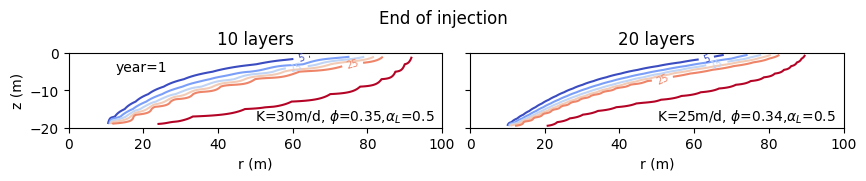

In [30]:
tstep = 3030
title = f'End of injection'

n_years = 1

years = np.arange(0, n_years, 1)
fig, ax = plt.subplots(n_years, len(ds_lst),figsize=(10,2),sharex=True,sharey=True, gridspec_kw = {'wspace':0.075, 'hspace':0.15})
plt.suptitle(title,y=0.9)
for ds_index, ds in enumerate(ds_lst):
    for year in years:
        if len(ds_lst) > 1 and len(years) >1 : axs = ax[year, ds_index]
        if len(ds_lst) <= 1: axs = ax[year]
        if len(years) <= 1: axs = ax[ds_index]
        if ds_index == 0: 
            r = r_200
            zc = z_10
        else: 
            r = r_300
            zc = z_20
        axs.set_xlim((0, 100))
        axs.set_ylim((-20, 0))
        data = ds.isel(year=year,tstep=tstep)
        cls = axs.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
        axs.clabel(cls, cls.levels[::2], inline=True, fontsize=7)
        if year == 0: axs.set_xlabel("r (m)")
        else: axs.set_xticks([], minor=True)
        if year == 9: axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
        if year % 2 == 0 and ds_index == 0:  axs.set_ylabel("z (m)")
        if year == 0: 
            k,npor, alphaL,nlay = params[ds_index][0],params[ds_index][1],params[ds_index][2],params[ds_index][3]
            axs.set_title(fr'{nlay} layers')
            axs.annotate(fr'K={k}m/d, $\phi$={npor},$\alpha_L$={alphaL}',(50,-18))
        if ds_index == 0:
            axs.annotate(f'year={year+1}',(12.5,-5))
        axs.set_aspect("equal")

plt.tight_layout()
plt.savefig(fr'figures/overview_difference_in_layers_{title.replace(' ',"_")}.png',bbox_inches="tight")

In [31]:
ds_lst =[]
files = [r"output\store_concentrations_k-25_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_36.nc"] * 3
for file in files:
    ds_lst.append(xr.open_dataarray(file))
params = [[25,0.35,0.5,20],[25,0.35,0.5,20], [25,0.35,0.5,20]] 

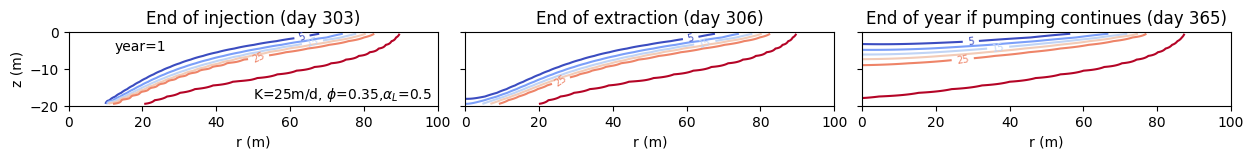

In [32]:


n_years = 1

years = np.arange(0, n_years, 1)
fig, ax = plt.subplots(n_years, len(ds_lst),figsize=(15,2),sharex=True,sharey=True, gridspec_kw = {'wspace':0.075, 'hspace':0.15})
for ds_index, ds in enumerate(ds_lst):
    for year in years:
        if len(ds_lst) > 1 and len(years)>1 : axs = ax[year, ds_index]
        if len(ds_lst) == 1: axs = ax
        if len(years) <= 1 and len(ds_lst)>1: axs = ax[ds_index]
        if ds_index == 0: 
            tstep = 3030
            title = f'End of injection (day 303)'
        elif ds_index == 1:
            tstep = 3061
            title = f'End of extraction (day 306)'
        else:
            tstep = 3649
            title = f'End of year if pumping continues (day 365)'
            
        r = r_300
        zc = z_20
        axs.set_xlim((0, 100))
        axs.set_ylim((-20, 0))
        data = ds.isel(year=year,tstep=tstep)
        cls = axs.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
        axs.clabel(cls, cls.levels[::2], inline=True, fontsize=7)
        axs.set_title(fr'{title}')
        if year == 0: axs.set_xlabel("r (m)")
        else: axs.set_xticks([], minor=True)
        if year == 9: axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
        if year % 2 == 0 and ds_index == 0:  axs.set_ylabel("z (m)")
        if ds_index ==  0: 
            k,npor, alphaL,nlay = params[ds_index][0],params[ds_index][1],params[ds_index][2],params[ds_index][3]
            axs.annotate(fr'K={k}m/d, $\phi$={npor},$\alpha_L$={alphaL}',(50,-18))
        if ds_index == 0:
            axs.annotate(f'year={year+1}',(12.5,-5))
        axs.set_aspect("equal")

plt.tight_layout()
plt.savefig(fr'figures/first_year_plot.png',bbox_inches="tight")

# injecting schedule:

In [44]:
Q_d = 40_000 # m^3/y
files = glob.glob(r'output/model_output_2024-02-02 11*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')

using latest output\model_output_2024-02-02 11_14.txt


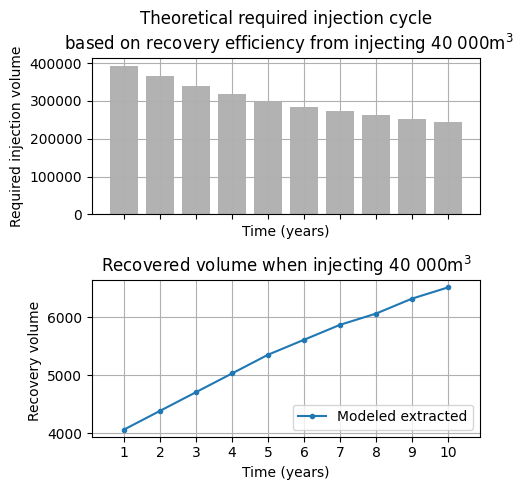

In [50]:
n = 0
fname = r'figures/theoretical_injection_cycle.png'
fig, ax = plt.subplots(2,1,figsize=(5,5), sharex=True)
# fig.suptitle("Recovery efficiency")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: 
        axs[i].set_ylabel("Required injection volume")
        axs[i].set_xlabel(r"Time (years)")
        axs[i].set_title(f"Theoretical required injection cycle\n based on recovery efficiency from injecting 40 000m$^3$")
        axs[i].set_xticks(ticks=cycle_n_arr)
        axs[i].grid()
    if i in [1]: 
        axs[i].set_ylabel("Recovery volume ")
        axs[i].set_xlabel(r"Time (years)")
        axs[i].set_title(f'Recovered volume when injecting 40 000m$^3$')
        k,npor,alphaL = 25,0.35, 0.5
        axs[i].annotate(fr'K={k}m/d, $\phi$={npor},$\alpha_L$={alphaL}',(0.9,3100))
        axs[i].set_xticks(ticks=cycle_n_arr)
        axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        if i in [0]:
            if n == 0:
                axs[1].plot(cycle_n_arr,load_arr[n,:]*Q_d/100,marker=".",label=f"Modeled extracted")
                axs[1].legend(loc="lower right")
                Q_injected_total = Q_d / load_arr[n,:] * 100
                axs[0].bar(cycle_n_arr,Q_injected_total,color="k",alpha=0.3,zorder=-1, label="Injection volume")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()